## Clustering Using K-Means and Iris

In [1]:
'''
Name:
Date:
ISTA 331
Collaborator(s):
'''

'\nName:\nDate:\nISTA 331\nCollaborator(s):\n'

In [24]:
import seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

The `iris` dataset (that you very well may have used before!) includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. We'll use this data to practice using k-means.

1. (2 pts) Read `iris.csv` into a Pandas DataFrame and plot it using Seaborn pairplot (`sns.pairplot(df_iris)`). Pairplots allow you to look at the relationships between multiple variables with each other, at the same time (you'll see they appear in a grid). If you are unfamiliar with Seaborn, it's another python visualization library (and it contains some really cool stuff! Definitely check it out: https://seaborn.pydata.org/)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

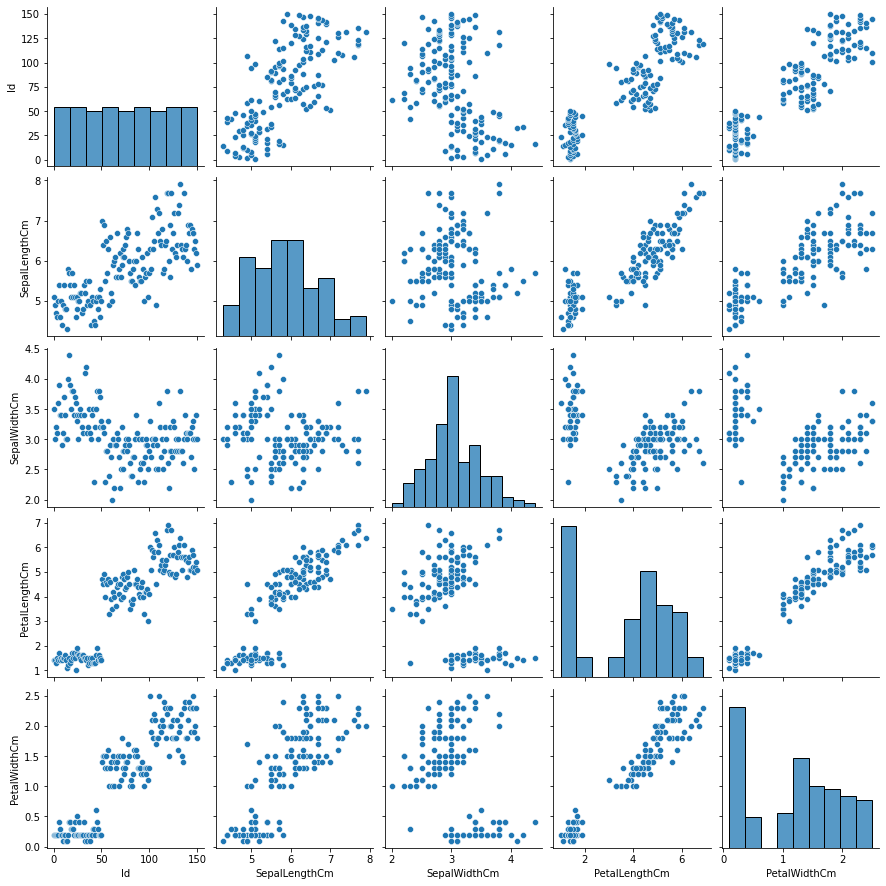

In [6]:
df_iris = pd.read_csv('iris.csv')
print(df_iris)
sns.pairplot(df_iris)

This is our proof-of-concept and it's always a good idea to look at the data you're working with before modelling it.

2. If we're trying to cluster the different iris species, what should the hyperparameter `k` be? (2 pts)

Answer: 3, for the three species.

3. Use the K-means algorithm to cluster the data and then compare the true labels to the predicted cluster labels using the method from the lecture (see the 'wine' example). Use the DataFrame `df_iris_unlabeled` initialized below, as well as the numeric labels created for Species (notice they don't exist in the data!) (6 pts)

In [22]:
df_iris_unlabeled = df_iris.drop(['Id','Species'], axis = 1)
# create numeric labels for species
labels = df_iris.Species.astype('category').cat.codes
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

Initialize and train classifier, get predictions:

In [10]:
cls = KMeans(n_clusters = 3)
cls.fit(X = df_iris_unlabeled.values)
clusters = cls.predict(df_iris_unlabeled.values) # could use training and test set for this

Compare KMeans clusters to the true species labels:

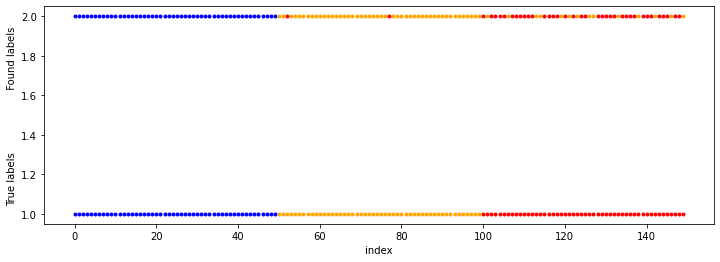

In [25]:
ax = plt.figure(figsize = (12, 4))
true_clusters = [df_iris.index[labels == i] for i in range(3)]
found_clusters = [df_iris.index[clusters == i] for i in range(3)]
found_clusters.sort(key = lambda l: min(l)) 
colors = ['blue', 'orange', 'red']
for i in range(3):
    plt.plot(true_clusters[i], np.ones_like(true_clusters[i]), '.', color = colors[i])
    plt.plot(found_clusters[i], 2 * np.ones_like(found_clusters[i]), '.', color = colors[i])
plt.xlabel('index')
plt.ylabel('True labels' + 20 * ' ' + 'Found labels')
plt.show()